# MCMC
## Metropolis Algorithm
* 우리의 목적 : 사후분포를 구해야한다! 
* 장애물 : 사후분포가 알려진 경우도 있지만 모르는 경우가 더 많음
* 해결 : 알고리즘-> 반복으로 사후분포를 만들자!
    * 해결방법중 하나가 Metropolis Algorithm 이다
        * Gibbs, Metropolis hastings 등등
        
### 스텝
* ***Step.1*** : 현재 모수(mu_current)에서 특정 분산(proposal_width) 내 있는 값을 추출(mu_proposal)
* ***Step.2*** : 베이지정리 분자 부분을 계산 (우도함수*사전분포) : p1,p2
    * $P(\theta|X) =\frac {P(X|\theta)\cdot P(\theta)}{P(X)} \propto P(X|\theta)\cdot P(\theta) $
* ***Step.3*** : p1/p2 를 계산하고 우도를 증가시는 방향으로 현재 모수를 업데이트
* ***Step.4*** : ***Step.1~3*** 를 충분히 많이 반복

### 간단 예제

In [4]:
data <- rnorm(100,5,1) #평균=5,분산=1 정규분포 100개 데이터 생성
mu_current <- runif(1,0,10) #초기값
proposal_width <-0.5 #업데이트 분산?
posterior <-c(mu_current)#업데이트값 저장
mu_prior_mu<-0;mu_prior_sd<-1 #모수 분포 초기화, 데이터 생성 분포와 무관
cat("현재 mu = ",mu_current)

현재 mu =  6.315392

* ***Step.1*** : 현재 모수(mu_current)에서 특정 분산(proposal_width) 내 있는 값을 추출(mu_proposal)

In [5]:
  mu_proposal <- rnorm(1,mu_current,proposal_width) 
#현재 mu와 업데이트분산을 따르는 정규분포에서 난수추출
cat ("제시된 mu = ",mu_proposal)

제시된 mu =  5.84603

* ***Step.2*** : 베이지정리 분자 부분을 계산 (우도함수*사전분포) : p1,p2
    * 간단하게 하기 위해 분산은 1로 설정
    * $P(X|\theta)$
    * $P(\theta)$

In [6]:
# mu_current,mu_prior_sd=1 인 정규분포를 가정하고 우도함수를 계산
  likelihood_current <- prod(dnorm(data,mu_current,mu_prior_sd)) 
  likelihood_proposal <- prod(dnorm(data,mu_proposal,mu_prior_sd))

# N(0,1)에 mu 의 확률값을 계산
  prior_current <- dnorm(mu_current,mu_prior_mu,mu_prior_sd)
  prior_proposal <- dnorm(mu_proposal,mu_prior_mu,mu_prior_sd)

# 베이즈정리 분자 부분 계산
  p_current<-likelihood_current*prior_current
  p_proposal<-likelihood_proposal*prior_proposal

cat("========현재========\n")
cat("우도 = ",likelihood_current,"\n")
cat("사전확률 = ",prior_current,"\n")
cat("베이즈정리 분자 부분 = ",p_current,"\n\n")

cat("========제안========\n")
cat("우도 = ",likelihood_proposal,"\n")
cat("사전확률 = ",prior_proposal,"\n")
cat("베이즈정리 분자 부분 = ",p_proposal,"\n")


========현재========
우도 =  6.844897e-105 
사전확률 =  8.713046e-10 
베이즈정리 분자 부분 =  5.963991e-114 

========제안========
우도 =  6.504942e-82 
사전확률 =  1.512413e-08 
베이즈정리 분자 부분 =  9.83816e-90 


* ***Step.3*** : p1/p2 를 계산하고 우도를 증가시는 방향으로 현재 모수를 업데이트

In [8]:
# 비율계산
  p_accept<-p_proposal/p_current

#채택규칙
  accept <- (runif(1)<p_accept)

cat("p1/p2 = ",p_accept,"\n")
cat("채택 통과 : ",accept,"\n")

p1/p2 =  1.649593e+24 
채택 통과 :  TRUE 


In [9]:
#통과시 모수 업데이트
cat("현재 mu : ",mu_current,"\n")
  if(accept){
    mu_current <- mu_proposal
  }
cat("업데이트후 mu : ",mu_current,"\n")

현재 mu :  6.315392 
업데이트후 mu :  5.84603 


* ***Step.4*** : ***Step.1~3*** 를 충분히 많이 반복

In [10]:
iter<-20000

data <- rnorm(100,5,1)
mu_current <- 2
proposal_width <-0.5
posterior <-c(mu_current)
mu_prior_mu<-0
mu_prior_sd<-1

for(i in 1:iter) {
  
  mu_proposal <- rnorm(1,mu_current,proposal_width)
  
  likelihood_current <- prod(dnorm(data,mu_current,mu_prior_sd))
  likelihood_proposal <- prod(dnorm(data,mu_proposal,mu_prior_sd))
  
  prior_current <- dnorm(mu_current,mu_prior_mu,mu_prior_sd)
  prior_proposal <- dnorm(mu_proposal,mu_prior_mu,mu_prior_sd)
  
  p_current<-likelihood_current*prior_current
  p_proposal<-likelihood_proposal*prior_proposal
  
  p_accept<-p_proposal/p_current
  
  accept <- (runif(1)<p_accept)
  
  if(accept){
    mu_current <- mu_proposal
  }
  
  posterior <- c(posterior,mu_current)
  
}

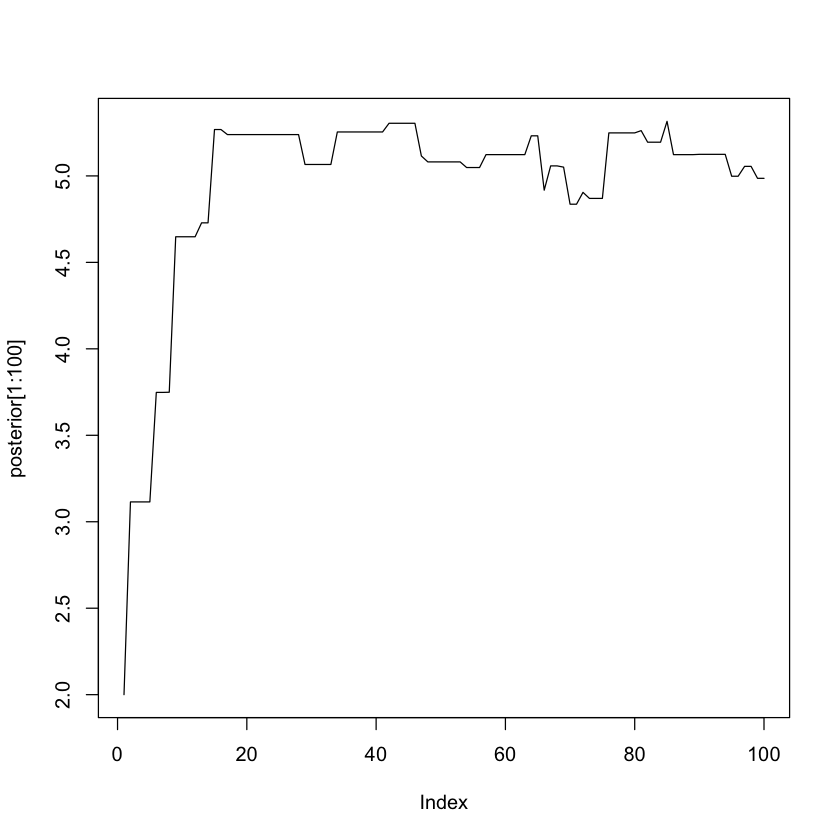

In [13]:
plot(posterior,type='l')
plot(posterior[1:100],type='l')

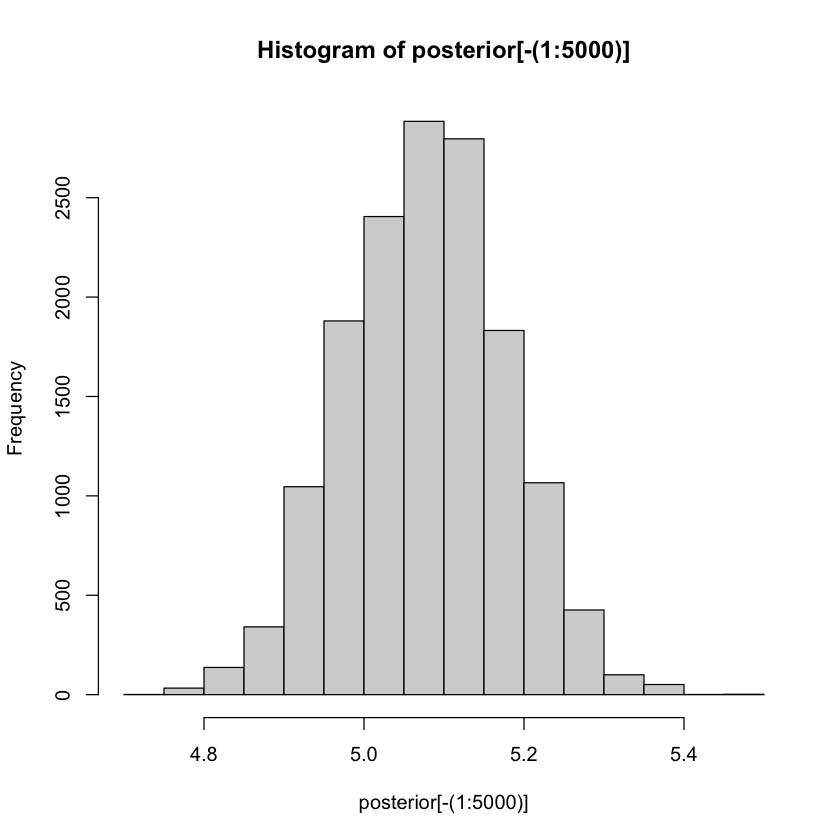

In [15]:
hist(posterior[-(1:5000)])

In [16]:
summary(posterior[-(1:5000)])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.719   5.007   5.078   5.077   5.142   5.469 